In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
mcf_drop_train = "MCF7_Filtered_Normalised_3000_Data_train.txt"
hcc_drop_train = "HCC1806_Filtered_Normalised_3000_Data_train.txt"
mcf_drop_test = "MCF7_Filtered_Normalised_3000_Data_test_anonim.txt"
hcc_drop_test = "HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt"


df = pd.read_csv(hcc_drop_train,delimiter=' ',engine='python',index_col=0).T
df_test = pd.read_csv(hcc_drop_test,delimiter=' ',engine='python',index_col=0).T

# EDA

In [ ]:
df

,H1-5,MALAT1,MT-RNR2,ARVCF,BCYRN1,ATXN7L2,IGFBP3,H1-3,CTIF,RNF123,...,BATF3,CDKN3,DLD,PMPCA,ZNF165,SCCPDH,NTAN1,CLIP2,DUSP23,ZNF682
AAAAAACCCGGC_Normoxia,2,3,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAACCGGATGC_Normoxia,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAACGAGCTAG_Normoxia,5,2,0,0,1,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAACTTCCCCG_Normoxia,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAAGCCTACCC_Normoxia,0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTACCAATC_Hypoxia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTTTCCGTGCA_Hypoxia,0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTTTGCCTGGG_Hypoxia,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTTTGTAACAG_Hypoxia,3,3,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14682 entries, AAAAAACCCGGC_Normoxia to TTTTTTTGAATC_Hypoxia
Columns: 3000 entries, H1-5 to ZNF682
dtypes: int64(3000)
memory usage: 336.2+ MB


In [ ]:
print('Missing values: ', df.isnull().sum().sum())

Missing values:  0


In [ ]:
print('Hypoxic:', pd.Series(('Hypo' in row) for row in df.index).sum())
print('Normo:', pd.Series(('Normo' in row) for row in df.index).sum())

Hypoxic: 8899
Normo: 5783


In [ ]:
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  0


In [ ]:
print("Number of duplicate columns: ", df.T.duplicated().sum())

Number of duplicate columns:  0


In [ ]:
df.T.describe()

,AAAAAACCCGGC_Normoxia,AAAACCGGATGC_Normoxia,AAAACGAGCTAG_Normoxia,AAAACTTCCCCG_Normoxia,AAAAGCCTACCC_Normoxia,AAACACAAATCT_Normoxia,AAACCAAGCCCA_Normoxia,AAACCATGCACT_Normoxia,AAACCTCCGGCT_Normoxia,AAACGCCGGTCC_Normoxia,...,TTTTCTGATGGT_Hypoxia,TTTTGATTCAGA_Hypoxia,TTTTGCAACTGA_Hypoxia,TTTTGCCGGGCC_Hypoxia,TTTTGTTAGCCT_Hypoxia,TTTTTACCAATC_Hypoxia,TTTTTCCGTGCA_Hypoxia,TTTTTGCCTGGG_Hypoxia,TTTTTGTAACAG_Hypoxia,TTTTTTTGAATC_Hypoxia
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.02900,0.041667,0.024333,0.021667,0.029667,0.020000,0.036000,0.02600,0.034000,0.029333,...,0.043000,0.049667,0.037000,0.047667,0.057000,0.023333,0.041667,0.041667,0.043333,0.040000
std,0.23276,0.309778,0.231860,0.189409,0.323761,0.170126,0.250449,0.23525,0.231362,0.218683,...,0.271739,0.319219,0.279864,0.259648,0.304053,0.214797,0.236536,0.285116,0.267356,0.282418
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.00000,9.000000,7.000000,4.000000,12.000000,3.000000,4.000000,6.00000,4.000000,4.000000,...,4.000000,7.000000,7.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,6.000000


Text(0.5, 1.0, 'Distribution of gene expression of some cells')

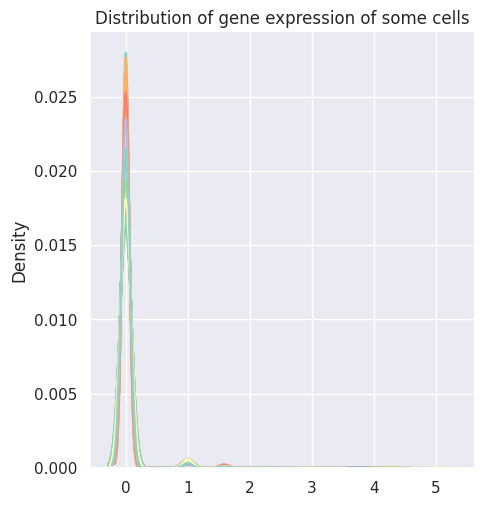

In [ ]:
sns.displot(data=(df.T.iloc[:,:250]+1).apply(np.log2),palette="Set3",kind="kde", bw_adjust=2, legend=False)
plt.title('Distribution of gene expression of some cells')

In [ ]:
X = df.to_numpy()

## Dimensionality reduction

## PCA

We first attempt PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X2D = pca.fit_transform(X_scaled)

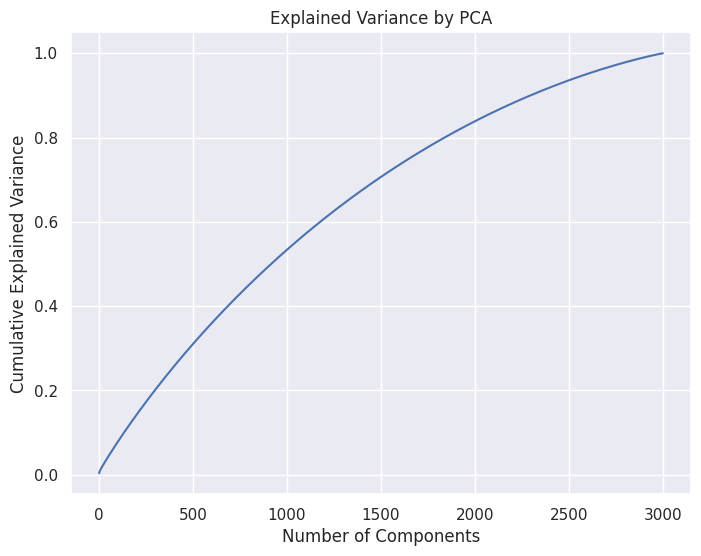

In [ ]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA')
plt.grid(True)
plt.show()

In [ ]:
print("sparsity level:", (df == 0).sum().sum() / df.size)


sparsity level: 0.9763756073196204


We see that we reach a high percentage of variance explained with almost every component. This might be due to the sparse nature of our dataset and its dimension.
Therefore, we won't use this method to reduce our dataset dimensionality.

In [ ]:
condition_hypo = np.array(['Hypoxia' in cell for cell in df.index])
condition_hypo

array([False, False, False, ...,  True,  True,  True])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, condition_hypo, test_size=0.25, random_state=0)

## Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import losses
from keras.models import Model
from keras.layers import Dense, Input, Dropout

2023-06-09 01:35:14.514894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 01:35:14.656565: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-09 01:35:14.663091: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-09 01:35:14.663109: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
def auto_encoder(input_size,n_neurons,hidden_size):

    inp = Input(shape=(input_size))

    # Encoder
    hidden_1 = Dense(n_neurons, activation='relu')(inp)
    #drop_1 = Dropout(0.5)(hidden_1)
    # Hidden layer
    h = Dense(hidden_size, activation='relu')(hidden_1)
    #drop_2 = Dropout(0.5)(h)

    # Decoder
    hidden_2 = Dense(n_neurons, activation='relu')(h)
    #drop_3 = Dropout(0.5)(hidden_2)

    outp = Dense(input_size, activation='relu')(hidden_2)

    autoencoder = Model(inp,outp)

    return autoencoder

In [ ]:
best_autoencoder, best_loss, best_params, best_history = None, np.inf, None, None
from keras.callbacks import EarlyStopping

for n_neurons in [i for i in range(100,500,100)]:
    for dim in [100,200,300]:
        autoencoder = auto_encoder(df.shape[1],n_neurons,dim)
        autoencoder.compile(optimizer='adam', loss='mse')
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)

        history = autoencoder.fit(x_train, x_train,
                epochs=50,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping])
        loss = history.history['val_loss'][-1]
        if loss<best_loss:
            best_loss = loss
            best_params = [n_neurons,dim]
            best_history = history
            best_autoencoder = autoencoder

2023-06-08 21:15:11.903787: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-08 21:15:11.903813: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-08 21:15:11.903827: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-37f973bc-772d-4e7f-9d08-c63d672a5bdb): /proc/driver/nvidia/version does not exist
2023-06-08 21:15:11.904053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Epoch 1/50
345/345 [==============================] - 2s 4ms/ste

In [ ]:
best_loss

0.0179874487221241

In [ ]:
best_params

[200, 200]

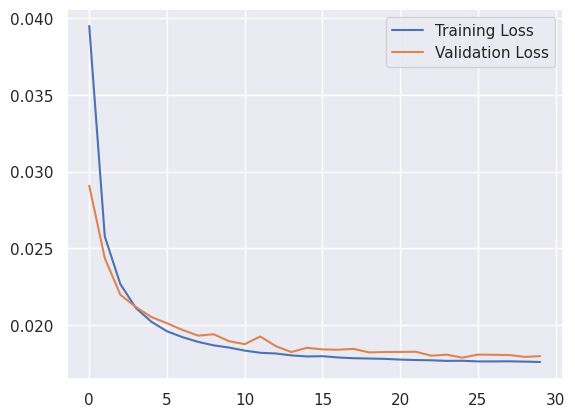

In [ ]:
plt.plot(best_history.history["loss"], label="Training Loss")
plt.plot(best_history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
best_autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense_16 (Dense)            (None, 200)               600200    
                                                                 
 dense_17 (Dense)            (None, 200)               40200     
                                                                 
 dense_18 (Dense)            (None, 200)               40200     
                                                                 
 dense_19 (Dense)            (None, 3000)              603000    
                                                                 
Total params: 1,283,600
Trainable params: 1,283,600
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder = keras.models.Sequential([
    best_autoencoder.get_layer(index=0),
    best_autoencoder.get_layer(index=1),
    best_autoencoder.get_layer(index=2)
])

hcc_auto_df = pd.DataFrame(encoder.predict(df))
hcc_auto_df.index = [df.index]
hcc_auto_df = hcc_auto_df.add_prefix('feature_')
hcc_auto_df.shape

459/459 [==============================] - 1s 1ms/step


(14682, 200)

In [ ]:
hcc_auto_test = pd.DataFrame(encoder.predict(df_test))
hcc_auto_test.index = [df_test.index]
hcc_auto_test = hcc_auto_test.add_prefix('feature_')
hcc_auto_test.shape

115/115 [==============================] - 0s 1ms/step


(3671, 200)

## DNN

In [ ]:
X = df.to_numpy()
y = np.array(['Hypoxia' in cell for cell in df.index])*1

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the model
model = Sequential()
model.add(Dense(1000, input_dim=3000, activation='relu'))
model.add(Dropout(0.5))  # Apply dropout with rate 0.5
#model.add(Dense(500, activation='relu'))  # Third hidden layer
#model.add(Dropout(0.5))  # Apply dropout with rate 0.5
for i in range(15):
    model.add(Dense(400, activation='relu'))  # Third hidden layer
    model.add(Dropout(0.5))  # Apply dropout with rate 0.5
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  
# Stop training when a monitored metric has stopped improving. 
# Here 'val_loss' is the chosen metric, and 'patience' is the number of epochs with no improvement after which training is stopped.

# Preprocessing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])


2023-06-09 02:33:02.303028: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 02:33:02.419053: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-09 02:33:02.423492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-09 02:33:02.423512: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

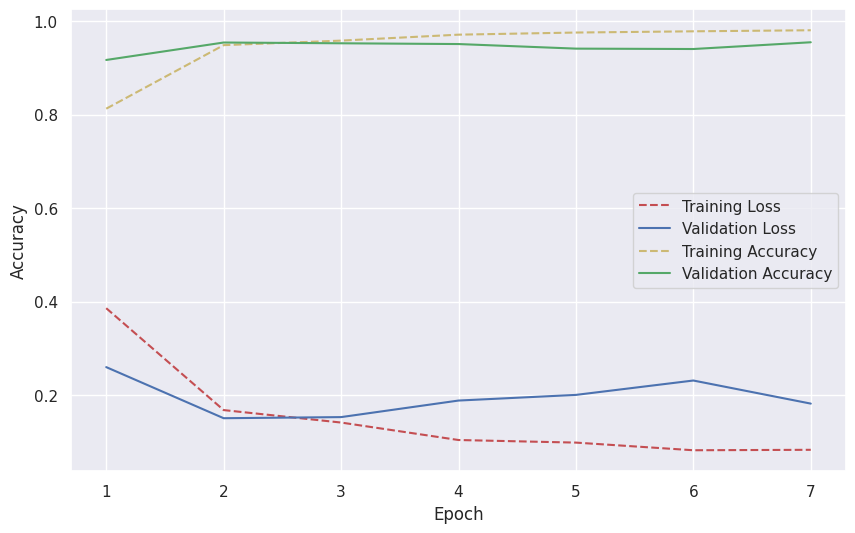

In [ ]:
# Get training and test loss histories and accuracies
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot loss on ax1
ax.plot(epoch_count, training_loss, 'r--')
ax.plot(epoch_count, validation_loss, 'b-')

# Plot accuracy on ax2
ax.plot(epoch_count, training_accuracy, 'y--')
ax.plot(epoch_count, validation_accuracy, 'g-')
ax.legend(['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.grid(True)

# Show the figure
plt.show()

# Logistic regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

'''
Comment to understand this function:

est: untrained model you are using (ex. KNN, SVC etc.)
params: parameters you want to train the model on
x_train, y_train are there just in case we want to use different datasets
random = True (default) uses RandomizedSearch
random = False uses GridSearch
'''

def cross_val(est, params, x_train, y_train, random=True, scoring='accuracy'):
    if random:
        clf = RandomizedSearchCV(est, params,scoring=scoring,random_state=0,n_iter=50,cv=5,n_jobs=-1)
    else:
        clf = GridSearchCV(est, params,scoring=scoring,verbose=0,n_jobs=-1)
    clf.fit(x_train, y_train)
    best_score = clf.best_score_
    best_params = clf.best_params_
    print(best_score)
    print(best_params)
    return clf.best_estimator_

In [ ]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, auc, roc_curve
from sklearn.metrics import RocCurveDisplay as RCD

'''
Comment to understand this function:

model: best model returned from cross val (which contains the model with the best parameters found)
x_train, y_train, x_test, y_test are there just in case we want to use different datasets
'''

def evaluation(model,x_train,y_train,x_test,y_test):
    best=clone(model)
    best.fit(x_train,y_train)
    y_pred = best.predict(x_test)

    #scores
    y_class_prob = best.predict_proba(x_test)

    acc = accuracy_score(y_test,y_pred)
    print('Accuracy score:', acc)
    lss = log_loss(y_test,y_class_prob)
    print('Log loss:', lss)
    roc_auc = roc_auc_score(y_test,y_class_prob[:,1])
    print('Roc-auc score:',roc_auc)
    f_1 = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
    print('Average f1-score:',f_1)
    print(classification_report(y_test, y_pred))

    fig,ax = plt.subplots(1,2,figsize=(18,5))

    #fpr-tpr

    RCD.from_estimator(best, x_test, y_test,ax=ax[0])
    ax[0].set_title('ROC curve')

    # confusion matrix

    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt="d",ax=ax[1])
    ax[1].set_title('Confusion Matrix')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('True')
    
    return acc,lss,roc_auc,f_1

In [ ]:
from sklearn.linear_model import LogisticRegression

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 28 is smaller than n_iter=50. Running 28 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
0.9529559023427305
{'penalty': 'l2', 'fit_intercept': True, 'C': 0.1}
Accuracy score: 0.9572323617542904
Log loss: 0.11835740055956397
Roc-auc score: 0.9909466884490078
Average f1-score: 0.955100017209088
              precision    recall  f1-score   support

       False       0.94      0.95      0.95      1426
        True       0.97      0.96      0.96      2245

    accuracy                           0.96      3671
   macro avg       0.95      0.96      0.96      3671
weighted avg       0.96      0.96      0.96      3671



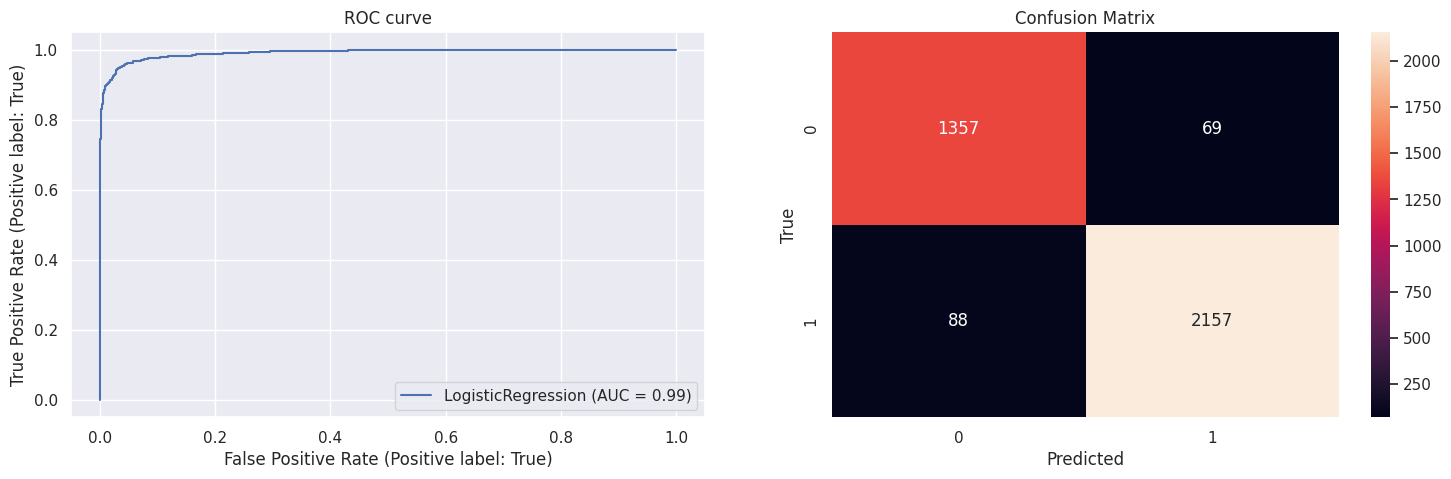

In [ ]:
lr = LogisticRegression(**{'penalty': 'l1', 'fit_intercept': False, 'C': 10},max_iter=10000,solver='liblinear',random_state=0)

lr_param = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'], 
    'fit_intercept': [True, False]
}

lr_best = cross_val(lr, lr_param, x_train, y_train, random=True)
lr_eval = evaluation(lr_best, x_train, y_train, x_test, y_test)

In [ ]:
model_prob_final = np.reshape(model.predict(df_test), (3671,))
lr_best.fit(X,y)
lr_prob_final = lr_best.predict_proba(df_test)
y_prob_final = (model_prob_final+lr_prob_final[:,1])/2
y_pred_final_hcc_drop = [(1 if y_prob_final[i] > 0.5 else 0) for i in range(len(df_test))]
y_pred_final_hcc_drop

115/115 [==============================] - 0s 4ms/step
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,


In [ ]:
np.savetxt('hcc_drop_predictions.txt',y_pred_final_hcc_drop,fmt='%1d')

# Results

We print the crosstabulation of our performance, together with the corresponding accuracy in the predictions.

In [4]:
import pandas as pd

data = {'0': [1400, 54], '1': [118, 2099]}

index = ['0', '1']

df = pd.DataFrame(data, index=index)

print(predictions)

accuracy = (df.iloc[0, 0] + df.iloc[1, 1])/(df.values.sum())
print(f"Accuracy: {accuracy * 100:.2f}%")

      0     1
0  1400   118
1    54  2099
Accuracy: 95.31%


We find an accuracy above 95%. Despite being a fairly high accuracy level, it could be further increased by carrying out greater hyperparameter selection processes and trying using different classification methods. Unfortunately, due to the lack of powerful computing resources, these steps required far too much time. Indeed, the 'DropSeq' datasets are far too large for us to create an optimal classification model with our tools alone.

In [1]:
%%shell
jupyter nbconvert --to html /content/HCC1806_drop_report.ipynb

[NbConvertApp] Converting notebook /content/HCC1806_drop_report.ipynb to html
[NbConvertApp] Writing 959490 bytes to /content/HCC1806_drop_report.html
